In [9]:
import geopandas
import geopandas as gpd
import pandas as pd
import json
import requests
import numpy as np
from plotly import express as px

from matplotlib import pyplot as plt
import pyproj

from pyproj import CRS
crs = CRS.from_epsg(4326)

In [10]:
# Retrieve data with municipal boundaries from PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
municipal_boundaries = gpd.read_file(geodata_url)[['statcode','statnaam','geometry']]
municipal_boundaries['statcode'] = municipal_boundaries['statcode'].apply(lambda x: x[2:].lstrip('0')).astype(int)
municipal_boundaries['value'] = range(len(municipal_boundaries))

municipal_boundaries = municipal_boundaries.rename({'statcode':'Gemeentecode','statnaam':'Gemeentenaam'}, axis=1)
municipal_boundaries = municipal_boundaries.set_index('Gemeentecode')

municipal_boundaries.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

# municipal_boundaries['geometry'] = municipal_boundaries_intermediate['geometry'].apply(lambda x: geopandas.GeoSeries([x]).__geo_interface__)

# def add_property(row):
#     row['geometry']['features'][0]['properties'] = {'Gemeentenaam':row['Gemeentenaam'],'Gemeentecode':row['Gemeentecode']}
#     row['geometry']['features'][0]['id'] = row['Gemeentecode']
#     return row

# municipal_boundaries = municipal_boundaries.apply(lambda x: add_property(x), axis=1)

In [11]:
# for row in municipal_boundaries.iterrows():
#     row[1]['geometry'].plot(column='value')

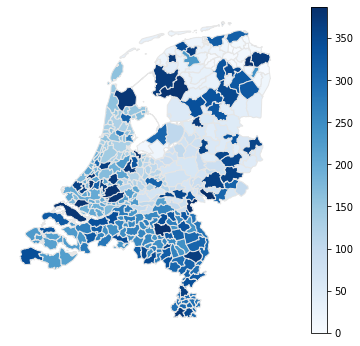

In [12]:
fig, ax = plt.subplots(1, figsize=(10,6))
municipal_boundaries.plot(column='value', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off');

In [13]:
# generate some data for each region defined in geojson...
#df = pd.read_csv('C:/Users/20175878/Documents/GitHub/2AMD20-group19/2_preprocessed_data/Municipalities.csv', sep=',')

# json_munis = municipal_boundaries.index
# test_values = range(len(json_munis))
# test_df = pd.DataFrame({'Gemeentecode':json_munis, 'test_values':test_values})

# fig = px.choropleth(
#     test_df,
#     geojson=municipal_boundaries.geometry,
#     locations="Gemeentecode",
#     color="test_values",
# )

# fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
# fig.update_geos(fitbounds="locations", visible=True)
# fig.show()

# fig = px.choropleth(municipal_boundaries, geojson=municipal_boundaries.geometry, 
#                     locations=municipal_boundaries.index, color="value",
#                     height=500,
#                    color_continuous_scale="Viridis")
# fig.update_geos(fitbounds="locations", visible=True)
# fig.update_layout(
#     title_text='Map'
# )
# fig.update(layout = dict(title=dict(x=0.5)))
# fig.update_layout(
#     margin={"r":0,"t":30,"l":10,"b":10},
#     coloraxis_colorbar={
#         'title':'value'})
# fig.show()


fig = px.choropleth(municipal_boundaries, geojson=municipal_boundaries.geometry, locations=municipal_boundaries.index, color="value")
fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [6]:
# from urllib.request import urlopen
# import json
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# counties

In [7]:
# municipal_polygons['features'][0]

In [8]:
geoplot.polyplot(municipal_polygons, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

NameError: name 'geoplot' is not defined

In [ ]:
municipal_boundaries_intermediate.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Gemeentecode": 3, "Gemeentenaam": "Appingedam"}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[254580.6743, 594573.5057], [254603.842, 595659.224], [254793.855, 596044.448], [254774.5456, 596453.0685], [254110.229, 596684.641], [254010.476, 596199.699], [253549.285, 596082.983], [252522.097, 596317.759], [251999.263, 596313.167], [251857.594, 596435.456], [251581.159, 596364.682], [251378.348, 596179.6], [251305.698, 596015.55], [251412.913, 595233.109], [251528.549, 595164.909], [251709.392, 594777.312], [251655.985, 594637.044], [251427.7759, 594486.7471], [251260.5275, 594393.8272], [250690.24, 594432.67], [250018.33, 594159.699], [249843.86, 594143.51], [249828.91, 594276.8], [249624.1176, 594206.2868], [249548.46, 593775.56], [249430.39, 593592.86], [249550.9486, 593214.6751], [249389.0031, 593097.3732], [249699.9, 592624.96], [249941.25, 592019.74], [249669.55, 591857.82], [250151